In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## OpenAlex Visualizations 

In [95]:
df1 = pd.read_csv("results1-668.csv")
df2 = pd.read_csv("results669-end.csv")
df1phd = pd.read_csv("phd_ver1-668.csv")
df2phd = pd.read_csv("phd_ver669-end.csv")
df1contr = pd.read_csv("contr_ver1-668.csv")
df2contr = pd.read_csv("contr_ver669-end.csv")
clean1 = pd.read_csv("clean1-668.csv")
clean2 = pd.read_csv("clean669-end.csv")

### Merging data frames 
Results obtained in two batches (if obtained in a single file, load all 4 files as above)

In [96]:
dois_df = pd.concat([df1, df2], ignore_index=True)

In [85]:
clean = pd.concat([clean1, clean2], ignore_index=True)

In [86]:
df_merged = pd.merge(df1phd, df2phd, on="Found how?", how="outer", suffixes=('_df1phd', '_df2phd'))
df_merged = df_merged.fillna(0)
df_merged["Total Count"] = df_merged["Value_df1phd"] + df_merged["Value_df2phd"]
df_result = df_merged[["Found how?", "Total Count"]]

In [87]:
df_merged = pd.merge(df1contr, df2contr, on="Found how?", how="outer", suffixes=('_df1contr', '_df2contr'))
df_merged = df_merged.fillna(0)
df_merged["Total Count"] = df_merged["Value_df1contr"] + df_merged["Value_df2contr"]
df_result_contr = df_merged[["Found how?", "Total Count"]]

### PhD candidate / Contributor matching graphs

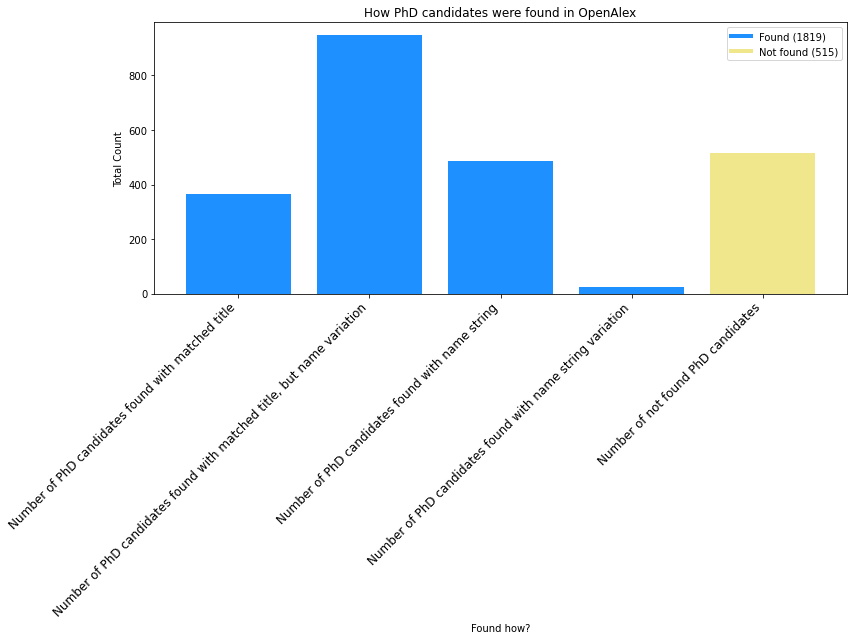

In [88]:
# PhD Candidates

df_result["Category"] = ["Found", "Found", "Found", "Found", "Not found"]

found_total = df_result[df_result["Category"] == "Found"]["Total Count"].sum()
not_found_total = df_result[df_result["Category"] == "Not found"]["Total Count"].sum()

color_map = {"Found": "dodgerblue", "Not found": "khaki"}
colors = df_result["Category"].map(color_map)

plt.figure(figsize=(12, 9))
bars = plt.bar(df_result["Found how?"], df_result["Total Count"], color=colors)

plt.title("How PhD candidates were found in OpenAlex")
plt.xlabel("Found how?")
plt.ylabel("Total Count")
plt.xticks(rotation=45, ha="right", fontsize=12)

found_patch = plt.Line2D([0], [0], color='dodgerblue', lw=4, label=f'Found ({found_total})')
not_found_patch = plt.Line2D([0], [0], color='khaki', lw=4, label=f'Not found ({not_found_total})')
plt.legend(handles=[found_patch, not_found_patch])

plt.tight_layout()
plt.savefig('phd_candidates_verification_countsX.jpg', dpi=300, bbox_inches='tight')
plt.show()

<ipython-input-89-6da374482880>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_result_contr["Category"] = ["Found", "Found", "For manual check", "Not found"]


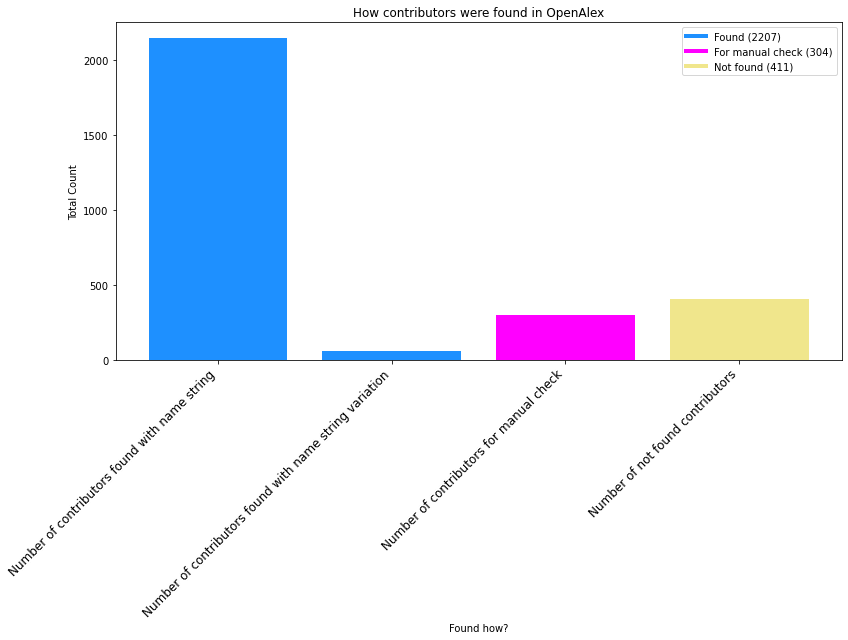

In [89]:
# Contributors

df_result_contr["Category"] = ["Found", "Found", "For manual check", "Not found"]

found_total = df_result_contr[df_result_contr["Category"] == "Found"]["Total Count"].sum()
not_found_total = df_result_contr[df_result_contr["Category"] == "Not found"]["Total Count"].sum()
manual_check = df_result_contr[df_result_contr["Category"] == "For manual check"]["Total Count"].sum()

color_map = {"Found": "dodgerblue", "Not found": "khaki", "For manual check": "magenta"}
colors = df_result_contr["Category"].map(color_map)

plt.figure(figsize=(12, 9))
bars = plt.bar(df_result_contr["Found how?"], df_result_contr["Total Count"], color=colors)

plt.title("How contributors were found in OpenAlex")
plt.xlabel("Found how?")
plt.ylabel("Total Count")
plt.xticks(rotation=45, ha="right", fontsize=12)

found_patch = plt.Line2D([0], [0], color='dodgerblue', lw=4, label=f'Found ({found_total})')
not_found_patch = plt.Line2D([0], [0], color='khaki', lw=4, label=f'Not found ({not_found_total})')
manual_check_patch = plt.Line2D([0], [0], color='magenta', lw=4, label=f'For manual check ({manual_check})')
plt.legend(handles=[found_patch, manual_check_patch, not_found_patch])

plt.tight_layout()
plt.savefig('contributors_verification_countsX.jpg', dpi=300, bbox_inches='tight')
plt.show()

### DOIs graphs

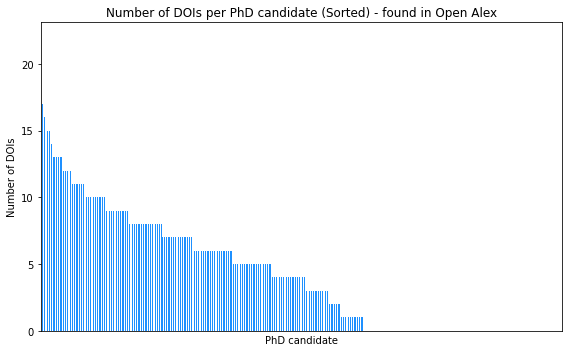

In [90]:
author_doi_counts = dois_df.groupby('PhD candidate')['DOIs count'].sum()

author_doi_counts = author_doi_counts.sort_values(ascending=False)

plt.figure(figsize=(8, 5))
author_doi_counts.plot(kind='bar', color='dodgerblue')
plt.title('Number of DOIs per PhD candidate (Sorted) - found in Open Alex')
plt.ylabel('Number of DOIs')
plt.locator_params(axis='y', integer=True)
plt.xticks([])
plt.tight_layout()
plt.savefig('dois_per_candX.jpg', dpi=300, bbox_inches='tight')
plt.show()

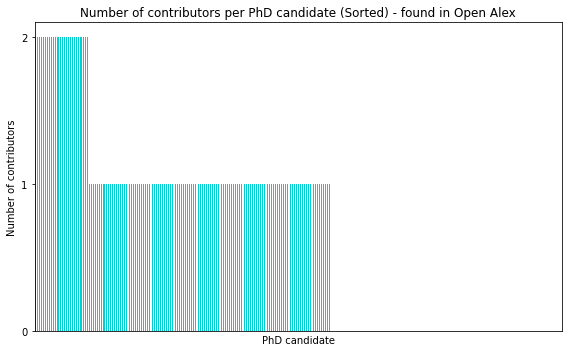

In [91]:
author_contributors_count = dois_df.groupby('PhD candidate')['Number of contributors with DOIs found in OpenAlex'].sum()

author_contributors_count = author_contributors_count.sort_values(ascending=False)

plt.figure(figsize=(8, 5))
author_contributors_count.plot(kind='bar', color='darkturquoise')
plt.title('Number of contributors per PhD candidate (Sorted) - found in Open Alex')
plt.ylabel('Number of contributors')
plt.locator_params(axis='y', integer=True)
plt.xticks([])
plt.tight_layout()
plt.savefig('cont_per_candX.jpg', dpi=300, bbox_inches='tight')
plt.show()

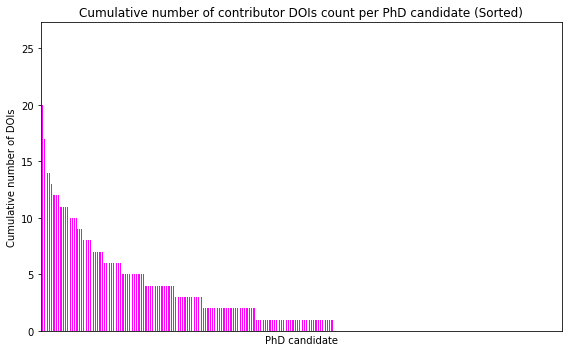

In [109]:
author_cumulative_dois_count = dois_df.groupby('PhD candidate')['Cumulative found Contributor DOIs count'].sum()

author_cumulative_dois_count = author_cumulative_dois_count.sort_values(ascending=False)

plt.figure(figsize=(8, 5))
author_cumulative_dois_count.plot(kind='bar', color='magenta')
plt.title('Cumulative number of contributor DOIs count per PhD candidate (Sorted)')
plt.ylabel('Cumulative number of DOIs')

plt.locator_params(axis='y', integer=True)

plt.xticks([])
plt.tight_layout()
plt.savefig('cumulativeX2.jpg', dpi=300, bbox_inches='tight')
plt.show()

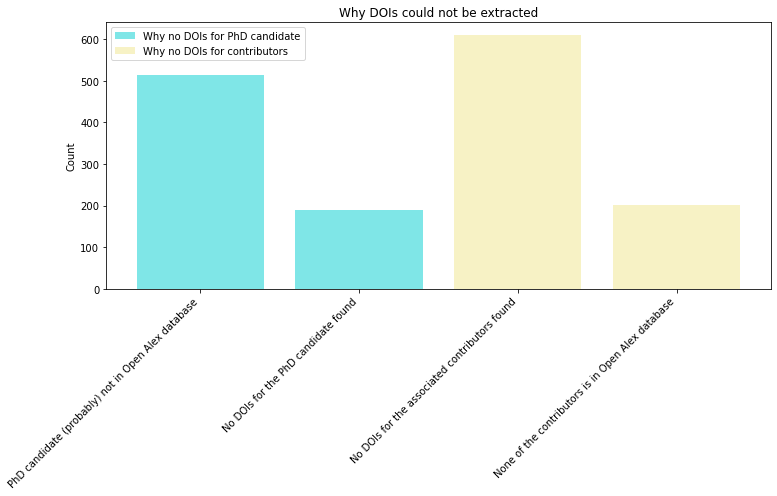

In [93]:
dois_df.fillna('Unknown', inplace=True)

unique_messages_column1 = dois_df['Why no DOIs for PhD candidate'].value_counts()
unique_messages_column2 = dois_df['Why no DOIs for contributors'].value_counts()

unique_messages_column1 = unique_messages_column1.drop('Unknown', errors='ignore')
unique_messages_column2 = unique_messages_column2.drop('Unknown', errors='ignore')

plt.figure(figsize=(11, 7))

plt.bar(unique_messages_column1.index, unique_messages_column1.values, alpha=0.5, label='Why no DOIs for PhD candidate', color='darkturquoise')
plt.bar(unique_messages_column2.index, unique_messages_column2.values, alpha=0.5, label='Why no DOIs for contributors', color='khaki')

plt.ylabel('Count')
plt.title('Why DOIs could not be extracted')
plt.xticks(rotation=45, ha='right')
plt.legend()

plt.tight_layout()
plt.savefig('no_dois_countsX.jpg', dpi=300, bbox_inches='tight')
plt.show()

In [99]:
df1 = pd.read_csv("results1-668.csv")
df2 = pd.read_csv("results669-end.csv")
dois_df = pd.concat([df1, df2], ignore_index=True)

mean_dois_per_author = dois_df['DOIs count'].mean()
median_dois_per_author = dois_df['DOIs count'].median()

mean_found_contributors = dois_df['Number of contributors with DOIs found in OpenAlex'].mean()
median_found_contributors = dois_df['Number of contributors with DOIs found in OpenAlex'].median()

mean_cumulative_dois_count = dois_df['Cumulative found Contributor DOIs count'].mean()
median_cumulative_dois_count = dois_df['Cumulative found Contributor DOIs count'].median()

nan_author_dois_count = dois_df['PhD candidate DOIs found in OpenAlex'].isnull().sum()
nan_contributors_dois_count = dois_df['Contributors-DOIs Dictionary'].isnull().sum()

summary_data = {
    'Statistics': ['Mean DOIs per PhD candidate', 'Median DOIs per PhD candidate',
                   'Mean Found Contributors', 'Median Found Contributors',
                   'Mean Cumulative DOIs Count', 'Median Cumulative DOIs Count',
                   'NaN Values for PhD candidate DOIs', 'NaN Values for Contributors DOIs'],
    'Values': [mean_dois_per_author, median_dois_per_author,                           # round if needed
               mean_found_contributors, median_found_contributors,
               mean_cumulative_dois_count, median_cumulative_dois_count,
               nan_author_dois_count, nan_contributors_dois_count]
}

summary_df = pd.DataFrame(summary_data)

summary_df

,Statistics,Values
0,Mean DOIs per PhD candidate,4.125539
1,Median DOIs per PhD candidate,4.000000
2,Mean Found Contributors,0.664332
3,Median Found Contributors,1.000000
4,Mean Cumulative DOIs Count,2.445582
5,Median Cumulative DOIs Count,1.000000
6,NaN Values for PhD candidate DOIs,705.000000
7,NaN Values for Contributors DOIs,812.000000


### Clean extraction

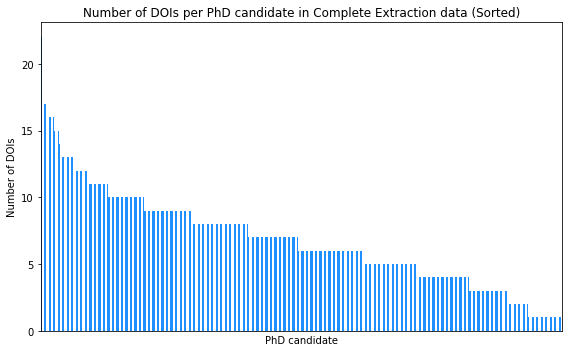

In [110]:
author_doi_counts = clean.groupby('PhD candidate')['DOIs count'].sum()

author_doi_counts = author_doi_counts.sort_values(ascending=False)

plt.figure(figsize=(8, 5))
author_doi_counts.plot(kind='bar', color='dodgerblue')
plt.title('Number of DOIs per PhD candidate in Complete Extraction data (Sorted)')
plt.ylabel('Number of DOIs')
plt.locator_params(axis='y', integer=True)
plt.xticks([])
plt.tight_layout()
plt.savefig('dois_per_cand_clean.jpg', dpi=300, bbox_inches='tight')
plt.show()

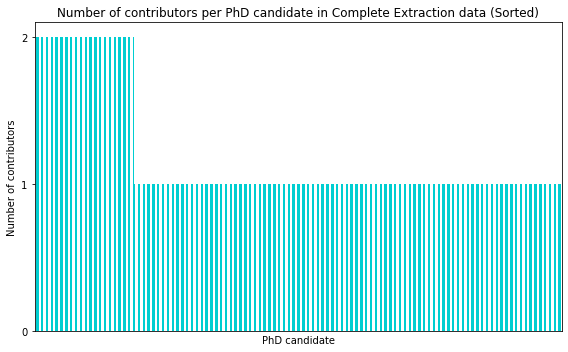

In [111]:
author_contributors_count = clean.groupby('PhD candidate')['Number of contributors with DOIs found in OpenAlex'].sum()

author_contributors_count = author_contributors_count.sort_values(ascending=False)

plt.figure(figsize=(8, 5))
author_contributors_count.plot(kind='bar', color='darkturquoise')
plt.title('Number of contributors per PhD candidate in Complete Extraction data (Sorted)')
plt.ylabel('Number of contributors')
plt.locator_params(axis='y', integer=True)
plt.xticks([])
plt.tight_layout()
plt.savefig('cont_per_cand_clean.jpg', dpi=300, bbox_inches='tight')
plt.show()

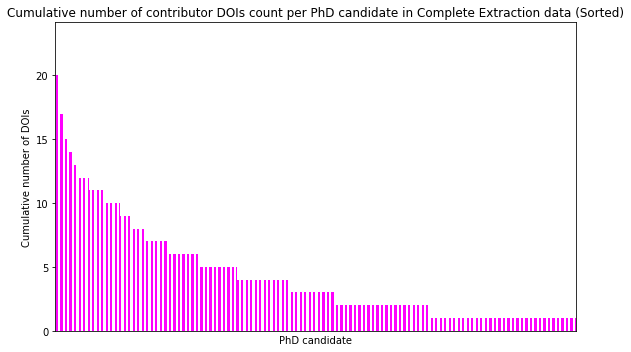

In [112]:
author_cumulative_dois_count = clean.groupby('PhD candidate')['Cumulative found Contributor DOIs count'].sum()

author_cumulative_dois_count = author_cumulative_dois_count.sort_values(ascending=False)

plt.figure(figsize=(8, 5))
author_cumulative_dois_count.plot(kind='bar', color='magenta')
plt.title('Cumulative number of contributor DOIs count per PhD candidate in Complete Extraction data (Sorted)')
plt.ylabel('Cumulative number of DOIs')

plt.locator_params(axis='y', integer=True)

plt.xticks([])
plt.tight_layout()
plt.savefig('cumulative_clean.jpg', dpi=300, bbox_inches='tight')
plt.show()

In [104]:
mean_dois_per_author = clean['DOIs count'].mean()
median_dois_per_author = clean['DOIs count'].median()

mean_found_contributors = clean['Number of contributors with DOIs found in OpenAlex'].mean()
median_found_contributors = clean['Number of contributors with DOIs found in OpenAlex'].median()

mean_cumulative_dois_count = clean['Cumulative found Contributor DOIs count'].mean()
median_cumulative_dois_count = clean['Cumulative found Contributor DOIs count'].median()

summary_data = {
    'Statistics': ['Mean DOIs per PhD candidate', 'Median DOIs per PhD candidate',
                   'Mean Found Contributors', 'Median Found Contributors',
                   'Mean Cumulative DOIs Count', 'Median Cumulative DOIs Count'],
    'Values': [mean_dois_per_author, median_dois_per_author,
               mean_found_contributors, median_found_contributors,
               mean_cumulative_dois_count, median_cumulative_dois_count]
}

summary_df = pd.DataFrame(summary_data)

summary_df

,Statistics,Values
0,Mean DOIs per PhD candidate,6.784591
1,Median DOIs per PhD candidate,6.000000
2,Mean Found Contributors,1.188679
3,Median Found Contributors,1.000000
4,Mean Cumulative DOIs Count,4.303459
5,Median Cumulative DOIs Count,3.000000
